<a href="https://colab.research.google.com/github/SamalaSagarReddy/MScProject/blob/main/MSc_Project_main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

In [2]:
import pandas as pd

### Amazon Sentiment analysis

In [3]:
# Turn .csv files into pandas DataFrame's
train_df = pd.read_csv('/content/drive/MyDrive/MSc Project/train_large_dataset.csv')
# if you want to load the dataset from local storage then use the below code, the above code is to load the dataset from the Google Drive location.
#train_df = pd.read_csv('train_large_dataset.csv')
train_df = train_df[train_df['text'].notnull()]
train_df = train_df.sample(frac=0.2)
print(train_df.shape)
train_df.head()

(80000, 2)


,target,text
136111,1,I've been a professional highend custom builde...
336170,0,"I bought this camera about 3 weeks ago, and ha..."
211416,1,This is the second pair of Feiyue shoes I've o...
100016,1,I can honestly say that I couldn't put this bo...
371501,1,These are probably the best trays you can get....


In [4]:
test_df = pd.read_csv('/content/drive/MyDrive/MSc Project/test_large_dataset.csv')
# if you want to load the dataset from local storage then use the below code, the above code is to load the dataset from the Google Drive location.
#train_df = pd.read_csv('test_large_dataset.csv')
test_df = test_df[test_df['text'].notnull()]
test_df = test_df.sample(frac=0.2)
print(test_df.shape)
test_df.head()

(79998, 1)


,text
126201,"Deluxe size, high quality beautiful stainless ..."
337277,Jaccard Simply Better 45 Knife Meat Tenderizer
203661,Buyer Beware - Not New As Advertised!!
350878,Overpriced and too Basic.
343487,"Problem with Map of Florence, Italy"


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,target,text
164349,0,I read this book in order to review my mathema...
111296,0,"-in the first place, it is not ""in depth"" what..."
166115,1,SCOTS is a great band; sort of the red-headed ...
271371,1,This is a wonderful compilation of songs to ac...
244819,1,This is one of a dozen things I have bought at...


### Below code is used to find the count of the values.

In [6]:
# How many examples of each class?
train_df.target.value_counts()

1    40011
0    39989
Name: target, dtype: int64

Since we have two target values, we're dealing with a binary classification problem.

It's fairly balanced too, about 50% negative class (target = 0) and 50% positive class (target = 1).

Where,

1 = Positive Review
0 = Negative Review
And what about the total number of samples we have?

### Total number of samples

In [7]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 80000
Total test samples: 79998
Total samples: 159998


### Visualise the 10 random training examples

In [8]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(Positive Review)" if target > 0 else "(Negative Review)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (Negative Review)
Text:
Please just take the time to read this.I love crappy movies. I really do. Bad graphics don't bother me. Hell, I'll give Bruce Campbell a good rating for his bad movies. I have many movies that are absolute trash but I love this. But this movie...wow. I bought a pack of 20 horror movies and this was on it. Sometimes I don't understand why some movies have bad ratings, but this one....WOW. 100% true.The beginning is interesting, hence the 2 stars. You really are like, "Okay, I don't see why this is going to be a bad movie. The people are believable, there's a monster, the environment is believable. What can be so wrong?" But by the end of the movie, especially the absolutely horrible ending, Just...For goodness sakes don't buy this movie. PLEASE. I love monster movies so this was the reason I bought the 20 horror dvds because I saw a movie about Loch Ness on it...booooooy was I wrong. Just...aweful.

---

Target: 1 (Positive Review)
Text:
If you don not 

### Split data into training and validation sets

In [8]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [9]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(72000, 72000, 8000, 8000)

In [11]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(["After playing with Ello-Opolis, Aqauria, and Fairytopia without any other Ello sets coming out, you get bored and stop playing with them. That's why you'll want to get Ello Shoptropolis! It's too cool with multi-color blocks and Ello fashions! The curvy walls add a new twist to the Ello set, along with the curly staircase!*INCLUDES COOL NEW STUFF LIKE ELLO PUPPY DOG AND SPARKLY POM-POMS! A MUST HAVE SET!*",
        "Look, straight up. Don't get this Book! It is a joke of a book. This thing is awful. Bad art and all! This thing is terrible! I give this book a ZERO! And I mean that! It will do you absolutely no good! Please save your money!",
        "This is a great book to read before making a trip to Gettysburg. A little over 500 pages in length, it covers Days 1 thru 3 and the Confederate's escape with a nice epilogue as well. Sears, with his descriptive narrative-like style, makes the reader feel like he's actually there witnessing the battles and events.Last time I was in 

## Converting text into numbers

### Text vectorization (tokenization)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?

In [13]:
# Find average number of tokens (words) in training reviews
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

74

In [11]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 50 # max length our sequences will be (e.g. how many words from a review does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [12]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

### Creating an Embedding using an Embedding Layer

In [13]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

## Model 0: Naive Bayes with TF-IDF Encoder (baseline)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
NaiveBayes_model = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
NaiveBayes_model.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [15]:
baseline_score = NaiveBayes_model.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 82.12%


In [16]:
# Make predictions
baseline_preds = NaiveBayes_model.predict(val_sentences)
baseline_preds[:20]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

### Creating an evaluation function for our model experiments

In [28]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [29]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 82.125,
 'f1': 0.8211229218463382,
 'precision': 0.8223805747375424,
 'recall': 0.82125}

## Model 1: Feed Forward Neural Network (dense model)

In [17]:
# Download helper functions script
!wget https://raw.githubusercontent.com/sagarreddy36/tensorflow-deep-learning/main/helper_functions.py

--2022-01-29 11:19:43--  https://raw.githubusercontent.com/sagarreddy36/tensorflow-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10951 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.69K  --.-KB/s    in 0s      

2022-01-29 11:19:44 (72.2 MB/s) - ‘helper_functions.py’ saved [10951/10951]



In [18]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [19]:
from tensorflow.keras import layers

In [20]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
#x = layers.GlobalMaxPool1D()(x) # Instead of GlobalAveragePooling1D, you can try GlobalMaxPool1D to see if it can improve accuracy.
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
SimpleDense_model = tf.keras.Model(inputs, outputs, name="SimpleDense_model") # construct the model

In [21]:
# Compile model
SimpleDense_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
# Get a summary of the model
SimpleDense_model.summary()

Model: "SimpleDense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,1

In [34]:
train_sentences.shape,val_sentences.shape,train_sentences[:10]

((72000,),
 (8000,),
 array(["After playing with Ello-Opolis, Aqauria, and Fairytopia without any other Ello sets coming out, you get bored and stop playing with them. That's why you'll want to get Ello Shoptropolis! It's too cool with multi-color blocks and Ello fashions! The curvy walls add a new twist to the Ello set, along with the curly staircase!*INCLUDES COOL NEW STUFF LIKE ELLO PUPPY DOG AND SPARKLY POM-POMS! A MUST HAVE SET!*",
        "Look, straight up. Don't get this Book! It is a joke of a book. This thing is awful. Bad art and all! This thing is terrible! I give this book a ZERO! And I mean that! It will do you absolutely no good! Please save your money!",
        "This is a great book to read before making a trip to Gettysburg. A little over 500 pages in length, it covers Days 1 thru 3 and the Confederate's escape with a nice epilogue as well. Sears, with his descriptive narrative-like style, makes the reader feel like he's actually there witnessing the battles and event

In [35]:
train_labels.shape, val_labels.shape

((72000,), (8000,))

In [23]:
# Fit the model
# input sentences can be a list of strings due to text preprocessing layer built-in model
SimpleDense_model_history = SimpleDense_model.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220129-112141
Epoch 1/5
2250/2250 [==============================] - 18s 7ms/step - loss: 0.4599 - accuracy: 0.7890 - val_loss: 0.3939 - val_accuracy: 0.8263
Epoch 2/5
2250/2250 [==============================] - 16s 7ms/step - loss: 0.3625 - accuracy: 0.8426 - val_loss: 0.3924 - val_accuracy: 0.8282
Epoch 3/5
2250/2250 [==============================] - 15s 7ms/step - loss: 0.3435 - accuracy: 0.8536 - val_loss: 0.3977 - val_accuracy: 0.8265
Epoch 4/5
2250/2250 [==============================] - 14s 6ms/step - loss: 0.3338 - accuracy: 0.8587 - val_loss: 0.4046 - val_accuracy: 0.8251
Epoch 5/5
2250/2250 [==============================] - 10s 5ms/step - loss: 0.3277 - accuracy: 0.8604 - val_loss: 0.4111 - val_accuracy: 0.8206


In [24]:
# Check the results
SimpleDense_model.evaluate(val_sentences, val_labels)

250/250 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8206


[0.41114261746406555, 0.8206250071525574]

In [25]:
# Make predictions (these come back in the form of probabilities)
SimpleDense_model_pred_probs = SimpleDense_model.predict(val_sentences)
SimpleDense_model_pred_probs[:10] # only print out the first 10 prediction probabilities

array([[0.695515  ],
       [0.00734269],
       [0.05022221],
       [0.9421086 ],
       [0.00471374],
       [0.9630576 ],
       [0.00176977],
       [0.94156396],
       [0.98296654],
       [0.78376204]], dtype=float32)

In [26]:
# Turn prediction probabilities into single-dimension tensor of floats
SimpleDense_model_preds = tf.squeeze(tf.round(SimpleDense_model_pred_probs)) # squeeze removes single dimensions
SimpleDense_model_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0.], dtype=float32)>

In [30]:
# Calculate model_1 metrics
SimpleDense_model_results = calculate_results(y_true=val_labels, 
                                    y_pred=SimpleDense_model_preds)
SimpleDense_model_results

{'accuracy': 82.0625,
 'f1': 0.8205458159240163,
 'precision': 0.8210522019180614,
 'recall': 0.820625}

In [31]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(SimpleDense_model_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [32]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=SimpleDense_model_results)

Baseline accuracy: 82.12, New accuracy: 82.06, Difference: -0.06
Baseline precision: 0.82, New precision: 0.82, Difference: -0.00
Baseline recall: 0.82, New recall: 0.82, Difference: -0.00
Baseline f1: 0.82, New f1: 0.82, Difference: -0.00


## Confusion Matrix

In [33]:
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  

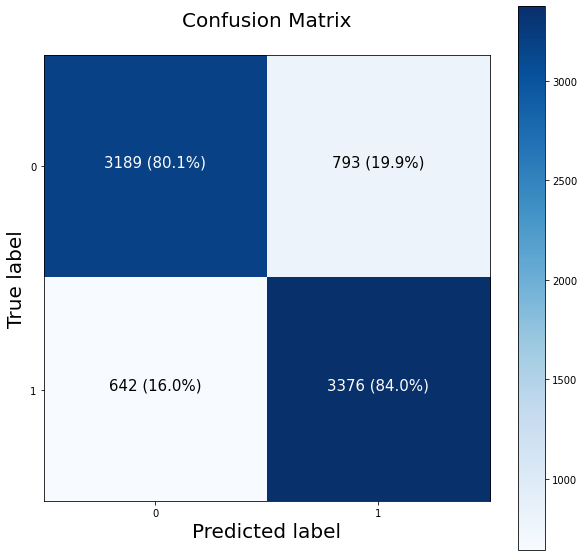

In [34]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(val_labels, tf.round(SimpleDense_model_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### Visualise the layers and their outputs

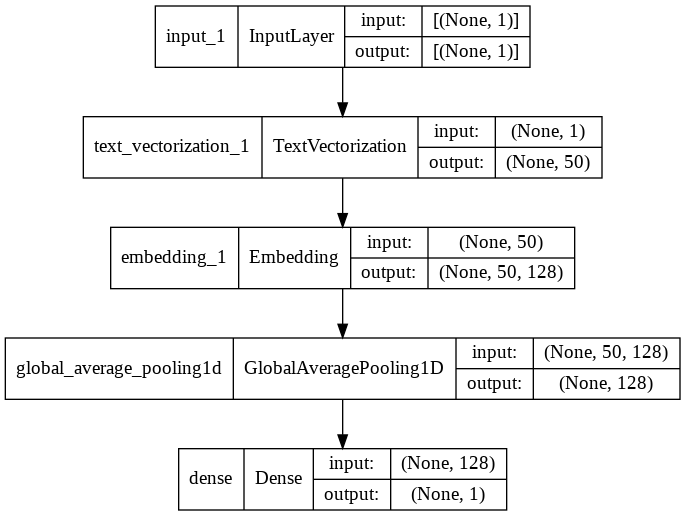

In [35]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(SimpleDense_model, show_shapes=True)

##Model 2: LSTM (Long Short-Term Memory)

In [36]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
LSTM_model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = LSTM_model_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the review (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
LSTM_model = tf.keras.Model(inputs, outputs, name="LSTM_model")

(None, 50, 128)
(None, 64)


In [37]:
# Compile model
LSTM_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
LSTM_model.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
______________________________________________

In [40]:
# Fit model
LSTM_model_history = LSTM_model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220129-112838
Epoch 1/5
2250/2250 [==============================] - 16s 7ms/step - loss: 0.1079 - accuracy: 0.9605 - val_loss: 0.5738 - val_accuracy: 0.8301
Epoch 2/5
2250/2250 [==============================] - 22s 10ms/step - loss: 0.0793 - accuracy: 0.9729 - val_loss: 0.6734 - val_accuracy: 0.8286
Epoch 3/5
2250/2250 [==============================] - 27s 12ms/step - loss: 0.0584 - accuracy: 0.9815 - val_loss: 0.6947 - val_accuracy: 0.8315
Epoch 4/5
2250/2250 [==============================] - 24s 10ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.7350 - val_accuracy: 0.8324
Epoch 5/5
2250/2250 [==============================] - 18s 8ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.8251 - val_accuracy: 0.8232


In [41]:
# Make predictions on the validation dataset
LSTM_model_pred_probs = LSTM_model.predict(val_sentences)
LSTM_model_pred_probs.shape, LSTM_model_pred_probs[:10] # view the first 10

((8000, 1), array([[2.6160156e-04],
        [1.0037901e-04],
        [1.5881807e-03],
        [9.9906129e-01],
        [1.5500955e-03],
        [4.8768288e-01],
        [4.8161094e-04],
        [9.9999344e-01],
        [9.9940491e-01],
        [7.4080261e-03]], dtype=float32))

In [42]:
# Round out predictions and reduce to 1-dimensional array
LSTM_model_preds = tf.squeeze(tf.round(LSTM_model_pred_probs))
LSTM_model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0.], dtype=float32)>

In [43]:
# Calculate LSTM model results
LSTM_model_results = calculate_results(y_true=val_labels,
                                    y_pred=LSTM_model_preds)
LSTM_model_results

{'accuracy': 82.325,
 'f1': 0.8232373608456623,
 'precision': 0.8232943029427763,
 'recall': 0.82325}

In [45]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, LSTM_model_results)

Baseline accuracy: 82.12, New accuracy: 82.33, Difference: 0.20
Baseline precision: 0.82, New precision: 0.82, Difference: 0.00
Baseline recall: 0.82, New recall: 0.82, Difference: 0.00
Baseline f1: 0.82, New f1: 0.82, Difference: 0.00


## Model 3: GRU (Gated Recurrent Units)

In [46]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
GRU_model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = GRU_model_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
GRU_model = tf.keras.Model(inputs, outputs, name="GRU_model")

In [47]:
# Compile GRU model
GRU_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [48]:
# Get a summary of the GRU model
GRU_model.summary()

Model: "GRU_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_______________________________________________

In [49]:
# Fit model
GRU_model_history = GRU_model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20220129-113050
Epoch 1/5
2250/2250 [==============================] - 18s 7ms/step - loss: 0.4262 - accuracy: 0.7938 - val_loss: 0.3524 - val_accuracy: 0.8480
Epoch 2/5
2250/2250 [==============================] - 15s 7ms/step - loss: 0.3059 - accuracy: 0.8696 - val_loss: 0.3490 - val_accuracy: 0.8508
Epoch 3/5
2250/2250 [==============================] - 15s 7ms/step - loss: 0.2506 - accuracy: 0.8963 - val_loss: 0.3688 - val_accuracy: 0.8413
Epoch 4/5
2250/2250 [==============================] - 16s 7ms/step - loss: 0.1934 - accuracy: 0.9228 - val_loss: 0.4121 - val_accuracy: 0.8322
Epoch 5/5
2250/2250 [==============================] - 16s 7ms/step - loss: 0.1424 - accuracy: 0.9449 - val_loss: 0.4975 - val_accuracy: 0.8309


In [50]:
# Make predictions on the validation data
GRU_model_pred_probs = GRU_model.predict(val_sentences)
GRU_model_pred_probs.shape, GRU_model_pred_probs[:10]

((8000, 1), array([[4.3048328e-01],
        [5.0133374e-03],
        [3.7571252e-03],
        [9.9626762e-01],
        [1.0205139e-03],
        [9.3466616e-01],
        [2.4172942e-04],
        [9.9329245e-01],
        [9.8116159e-01],
        [6.7355430e-01]], dtype=float32))

In [51]:
# Convert prediction probabilities to prediction classes
GRU_model_preds = tf.squeeze(tf.round(GRU_model_pred_probs))
GRU_model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [52]:
# Calcuate model_3 results
GRU_model_results = calculate_results(y_true=val_labels, 
                                    y_pred=GRU_model_preds)
GRU_model_results

{'accuracy': 83.0875,
 'f1': 0.8308345586775359,
 'precision': 0.8313255268817205,
 'recall': 0.830875}

In [53]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, GRU_model_results)

Baseline accuracy: 82.12, New accuracy: 83.09, Difference: 0.96
Baseline precision: 0.82, New precision: 0.83, Difference: 0.01
Baseline recall: 0.82, New recall: 0.83, Difference: 0.01
Baseline f1: 0.82, New f1: 0.83, Difference: 0.01


## Model 4: Bidirectional-LSTM (RNN)

In [54]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
BidirectionalLSTM_model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = BidirectionalLSTM_model_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
BidirectionalLSTM_model = tf.keras.Model(inputs, outputs, name="BidirectionalLSTM_model")

In [55]:
# Compile
BidirectionalLSTM_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
# Get a summary of our bidirectional model
BidirectionalLSTM_model.summary()

Model: "BidirectionalLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1

In [57]:
# Fit the model (takes longer because of the bidirectional layers)
BidirectionalLSTM_model_history = BidirectionalLSTM_model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20220129-113216
Epoch 1/5
2250/2250 [==============================] - 26s 10ms/step - loss: 0.4115 - accuracy: 0.8106 - val_loss: 0.3488 - val_accuracy: 0.8401
Epoch 2/5
2250/2250 [==============================] - 22s 10ms/step - loss: 0.2949 - accuracy: 0.8747 - val_loss: 0.3715 - val_accuracy: 0.8495
Epoch 3/5
2250/2250 [==============================] - 22s 10ms/step - loss: 0.2234 - accuracy: 0.9094 - val_loss: 0.3726 - val_accuracy: 0.8443
Epoch 4/5
2250/2250 [==============================] - 22s 10ms/step - loss: 0.1563 - accuracy: 0.9405 - val_loss: 0.4596 - val_accuracy: 0.8345
Epoch 5/5
2250/2250 [==============================] - 22s 10ms/step - loss: 0.1011 - accuracy: 0.9647 - val_loss: 0.5531 - val_accuracy: 0.8239


In [58]:
# Make predictions with bidirectional RNN on the validation data
BidirectionalLSTM_model_pred_probs = BidirectionalLSTM_model.predict(val_sentences)
BidirectionalLSTM_model_pred_probs[:10]

array([[9.6786575e-04],
       [1.1381720e-03],
       [4.8985268e-04],
       [9.9426419e-01],
       [8.8617908e-06],
       [9.9770159e-01],
       [1.2367485e-06],
       [9.9393362e-01],
       [9.9710935e-01],
       [9.1044056e-01]], dtype=float32)

In [59]:
# Convert prediction probabilities to labels
BidirectionalLSTM_model_preds = tf.squeeze(tf.round(BidirectionalLSTM_model_pred_probs))
BidirectionalLSTM_model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [60]:
# Calculate bidirectional RNN model results
BidirectionalLSTM_model_results = calculate_results(val_labels, BidirectionalLSTM_model_preds)
BidirectionalLSTM_model_results

{'accuracy': 82.3875,
 'f1': 0.8238595731273043,
 'precision': 0.823933794544866,
 'recall': 0.823875}

In [61]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, BidirectionalLSTM_model_results)

Baseline accuracy: 82.12, New accuracy: 82.39, Difference: 0.26
Baseline precision: 0.82, New precision: 0.82, Difference: 0.00
Baseline recall: 0.82, New recall: 0.82, Difference: 0.00
Baseline f1: 0.82, New f1: 0.82, Difference: 0.00


## Model 5: Conv1D (1D Convolutional Neural Network)

In [62]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 50, 128]), TensorShape([1, 46, 32]), TensorShape([1, 32]))

In [63]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 50, 128), dtype=float32, numpy=
 array([[[-0.05226654,  0.06047863, -0.00504419, ...,  0.02857119,
          -0.03107443,  0.06792203],
         [-0.00475364, -0.03250121,  0.03181313, ...,  0.09934089,
           0.06740981, -0.06360257],
         [-0.01266353, -0.04110214,  0.01794287, ..., -0.01034518,
           0.00409547, -0.05415931],
         ...,
         [ 0.02060481, -0.01297494, -0.0065774 , ..., -0.01414951,
           0.01720497, -0.00756202],
         [ 0.02060481, -0.01297494, -0.0065774 , ..., -0.01414951,
           0.01720497, -0.00756202],
         [ 0.02060481, -0.01297494, -0.0065774 , ..., -0.01414951,
           0.01720497, -0.00756202]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 46, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.1670962 ],
         [0.00228757, 0.        , 0.        , ..., 0.        ,
          0.15142024, 0.        ],
         [0.        , 0.14792955, 0.  

In [64]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
Conv1D_model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = Conv1D_model_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
Conv1D_model = tf.keras.Model(inputs, outputs, name="Conv1D_model")

# Compile Conv1D model
Conv1D_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
Conv1D_model.summary()

Model: "Conv1D_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                

In [99]:
# Fit the model
Conv1D_model_history = Conv1D_model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220129-113959
Epoch 1/5
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0161 - accuracy: 0.9970 - val_loss: 0.7473 - val_accuracy: 0.8217
Epoch 2/5
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.7760 - val_accuracy: 0.8338
Epoch 3/5
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.8740 - val_accuracy: 0.8314
Epoch 4/5
2250/2250 [==============================] - 14s 6ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.9835 - val_accuracy: 0.8246
Epoch 5/5
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 1.0579 - val_accuracy: 0.8296


In [100]:
# Make predictions with model_5
Conv1D_model_pred_probs = Conv1D_model.predict(val_sentences)
Conv1D_model_pred_probs[:10]

array([[3.9809481e-10],
       [2.1570996e-07],
       [9.3119505e-11],
       [1.0000000e+00],
       [4.3780822e-14],
       [9.9997509e-01],
       [1.9767322e-17],
       [9.9999356e-01],
       [9.9999619e-01],
       [9.9913222e-01]], dtype=float32)

In [101]:
# Convert model_5 prediction probabilities to labels
Conv1D_model_preds = tf.squeeze(tf.round(Conv1D_model_pred_probs))
Conv1D_model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [102]:
# Calculate model_5 evaluation metrics 
Conv1D_model_results = calculate_results(y_true=val_labels, 
                                    y_pred=Conv1D_model_preds)
Conv1D_model_results

{'accuracy': 82.96249999999999,
 'f1': 0.8294242712462847,
 'precision': 0.8309426810314375,
 'recall': 0.829625}

In [103]:
# Compare model_5 results to baseline 
compare_baseline_to_new_results(baseline_results, Conv1D_model_results)

Baseline accuracy: 82.12, New accuracy: 82.96, Difference: 0.84
Baseline precision: 0.82, New precision: 0.83, Difference: 0.01
Baseline recall: 0.82, New recall: 0.83, Difference: 0.01
Baseline f1: 0.82, New f1: 0.83, Difference: 0.01


## Comparing the performance of each of our models

In [104]:
# Combine model results into a DataFrame excluding the transfer learning
all_model_results = pd.DataFrame({"baseline(Naive Bayes)": baseline_results,
                                  "simple_dense": SimpleDense_model_results,
                                  "lstm": LSTM_model_results,
                                  "gru": GRU_model_results,
                                  "bidirectional": BidirectionalLSTM_model_results,
                                  "conv1d": Conv1D_model_results,
                                 })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline(Naive Bayes),82.1250,0.822381,0.821250,0.821123
simple_dense,82.0625,0.821052,0.820625,0.820546
lstm,82.3250,0.823294,0.823250,0.823237
gru,83.0875,0.831326,0.830875,0.830835
bidirectional,82.3875,0.823934,0.823875,0.823860
conv1d,82.9625,0.830943,0.829625,0.829424


In [105]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

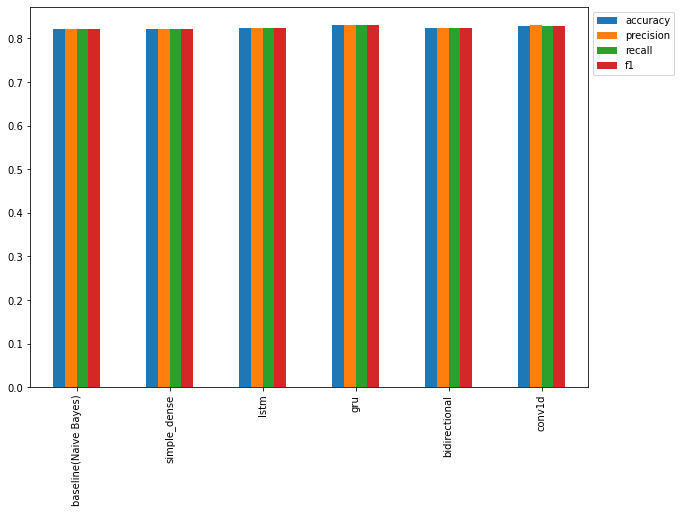

In [106]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

In [107]:
all_model_results

,accuracy,precision,recall,f1
baseline(Naive Bayes),0.821250,0.822381,0.821250,0.821123
simple_dense,0.820625,0.821052,0.820625,0.820546
lstm,0.823250,0.823294,0.823250,0.823237
gru,0.830875,0.831326,0.830875,0.830835
bidirectional,0.823875,0.823934,0.823875,0.823860
conv1d,0.829625,0.830943,0.829625,0.829424


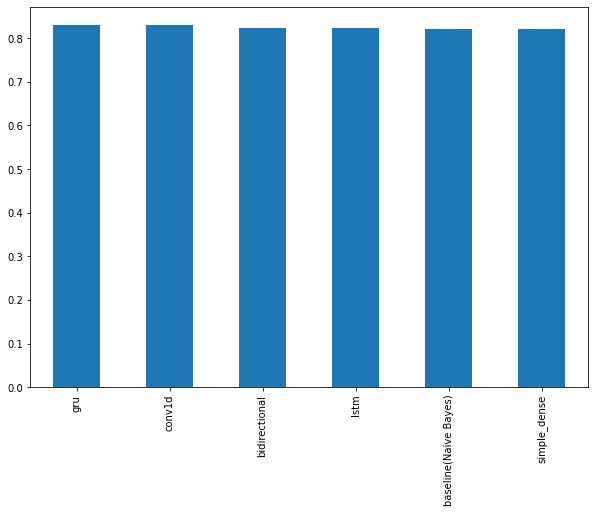

In [108]:
# Sort model results by f1-score
ax =all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Saving and loading a trained model

In [75]:
# # Save TF Hub Sentence Encoder model to HDF5 format
# model_4.save('model_4_SavedModel_format')

In [76]:
# # Load model with custom Hub Layer (required with HDF5 format)
# loaded_model_4 = tf.keras.models.load_model("model_4_SavedModel_format")

In [77]:
# How does our loaded model perform?
# loaded_model_4.evaluate(val_sentences, val_labels)

In [78]:
# model_4_results

Download files from google colab

In [79]:
# from google.colab import files
# files.download('model_4_SavedModel_format')

In [80]:
# # Save TF Hub Sentence Encoder model to HDF5 format
# model_6.save("model_6.h5")

In [81]:
# # How does our loaded model perform?
# loaded_model_6.evaluate(val_sentences, val_labels)

In [82]:
# # Save TF Hub Sentence Encoder model to SavedModel format (default)
# model_6.saved_model.save("model_6_SavedModel_format")

In [109]:
import time
t = time.time()

export_path_sm = "/content/drive/MyDrive/MSc Project/Transfer_Learning_model"
print(export_path_sm)

tf.keras.models.save_model(GRU_model, export_path_sm)

/content/drive/MyDrive/MSc Project/Transfer_Learning_model


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MSc Project/Transfer_Learning_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MSc Project/Transfer_Learning_model/assets


In [84]:
!zip -r model.zip {export_path_sm}

	zip warning: name not matched: /content/drive/MyDrive/MSc
	zip warning: name not matched: Project/Transfer_Learning_model

zip error: Nothing to do! (try: zip -r model.zip . -i /content/drive/MyDrive/MSc Project/Transfer_Learning_model)


In [85]:
!ls

drive  helper_functions.py  model_logs	model.png  __pycache__	sample_data


In [86]:
# try:
#   from google.colab import files
#   files.download('./model.zip')
# except ImportError:
#   pass

In [87]:
# # Load TF Hub Sentence Encoder SavedModel
# loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [88]:
# # Evaluate loaded SavedModel format
# loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

## Test the Model

In [89]:
target = tf.squeeze(tf.round(LSTM_model.predict(["doesn't even fit"])))
print(f"Target: {target}", "(Positive Review)" if target > 0 else "(Negative Review)")

Target: 0.0 (Negative Review)
